# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url).json()

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_weather['coord']['lat'], 
                          "Lng": city_weather['coord']['lon'], 
                          "Max Temp": city_weather['main']['temp_max'],
                          "Humidity": city_weather['main']['humidity'],
                          "Cloudiness": city_weather['clouds']['all'],
                          "Wind Speed": city_weather['wind']['speed'],
                          "Country": city_weather['sys']['country'],
                          "Date": city_weather['dt']})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | ola
Processing Record 4 of Set 1 | puerto ayora


Processing Record 5 of Set 1 | ouadda
Processing Record 6 of Set 1 | uturoa
Processing Record 7 of Set 1 | dudinka
Processing Record 8 of Set 1 | fort st. john
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | ippy
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | caleta de carquin
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | kulunda
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | goundam
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | al mutayrifi
Processing Record 23 of Set 1 | klyuchi
Processing Record 24 of Set 1 | saipan
Processing Record 25 of Set 1 | karratha
Processing Record 26 of Set 1 | bredasdorp
Processing Record 27 of Set 1 | edinburgh of the seven s

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.4112,100.3354,79.95,91,20,2.30,MY,1715896771
1,longyearbyen,78.2186,15.6401,28.24,54,40,10.36,SJ,1715896907
2,ola,59.5833,151.2833,41.14,86,32,2.64,RU,1715897448
3,puerto ayora,-0.7393,-90.3518,84.16,93,27,3.00,EC,1715896916
4,ouadda,8.0777,22.4007,76.44,55,13,2.30,CF,1715897448


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,79.95,91,20,2.30,MY,1715896771
1,longyearbyen,78.2186,15.6401,28.24,54,40,10.36,SJ,1715896907
2,ola,59.5833,151.2833,41.14,86,32,2.64,RU,1715897448
3,puerto ayora,-0.7393,-90.3518,84.16,93,27,3.00,EC,1715896916
4,ouadda,8.0777,22.4007,76.44,55,13,2.30,CF,1715897448


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

'Thu May 16 18:19:11 2024'

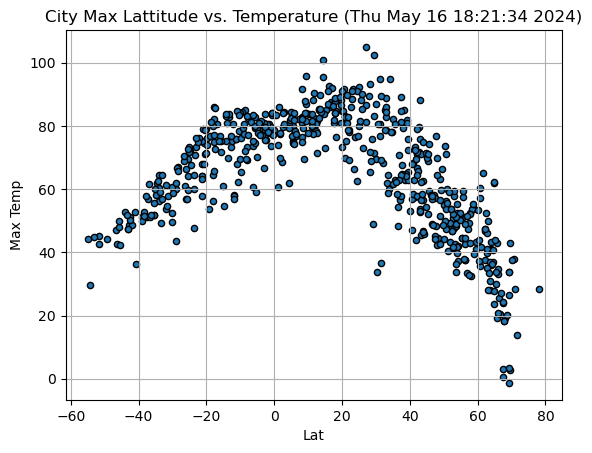

In [33]:
city_data_df.plot.scatter('Lat','Max Temp', grid=True, edgecolor='black', title=f'City Max Lattitude vs. Temperature ({time.ctime()})')
plt.savefig("output_data/Fig1.png")
plt.show()

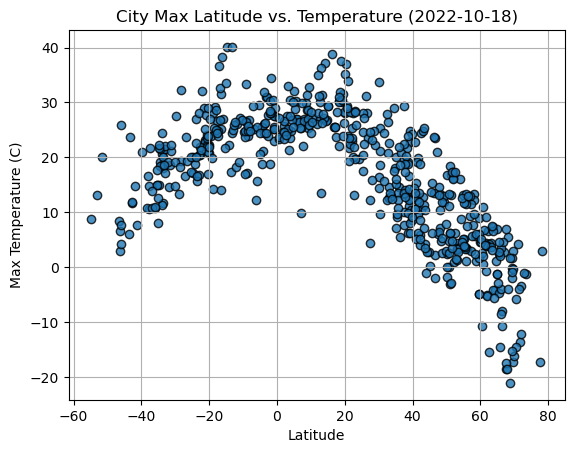

In [8]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
city_data_df.plot.scatter('Lat','Max Temp', grid=True, edgecolor='black', title=f'City Max Lattitude vs. Temperature ({time.ctime()})')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

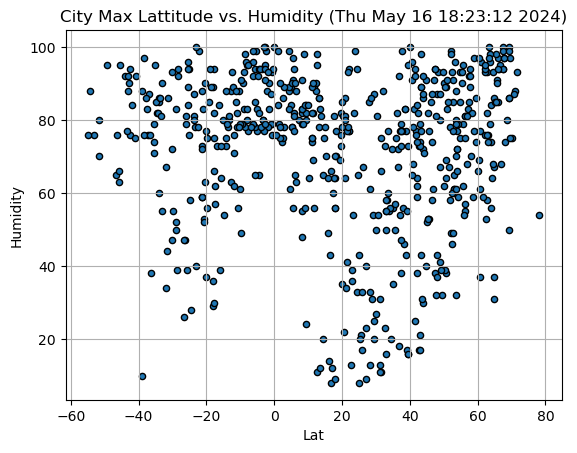

In [34]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
city_data_df.plot.scatter('Lat','Humidity', grid=True, edgecolor='black', title=f'City Max Lattitude vs. Humidity ({time.ctime()})')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
# Show plot
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)
plt.show()
plt.show()

#### Latitude Vs. Cloudiness

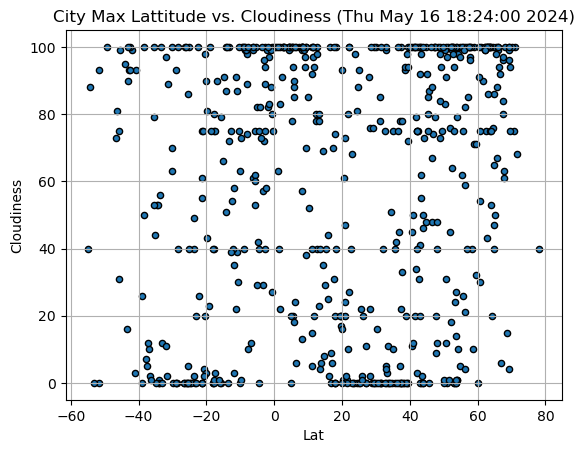

In [35]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
city_data_df.plot.scatter('Lat','Cloudiness', grid=True, edgecolor='black', title=f'City Max Lattitude vs. Cloudiness ({time.ctime()})')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

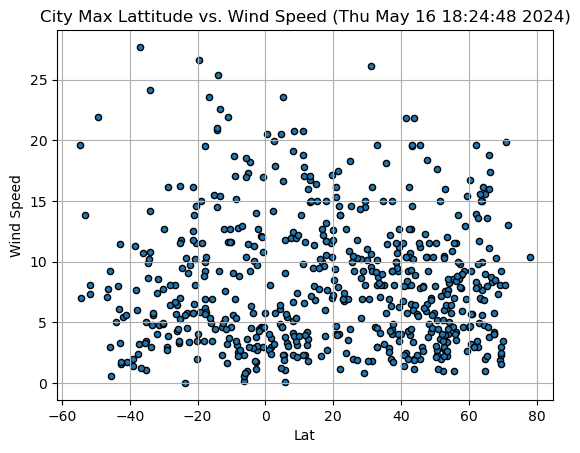

In [36]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
city_data_df.plot.scatter('Lat','Wind Speed', grid=True, edgecolor='black', title=f'City Max Lattitude vs. Wind Speed ({time.ctime()})')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
from sklearn import datasets 

# Grouping by date and calculating the average temperature for each date
filtered_df = pd.DataFrame[df['date_x'] > '1970-01-01']
avg_temp_by_date = filtered_df.groupby('date_x')['AverageTemperature'].mean()

# Creating x and y data for regression
x = np.arange(len(avg_temp_by_date)).reshape(-1, 1)
y = avg_temp_by_date.values.reshape(-1, 1)

# Performing linear regression
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculating the correlation coefficient (Pearson correlation)
corr_coef = np.corrcoef(x.ravel(), y_pred.ravel())[0, 1]

# Calculating the coefficient of determination (R^2)
r2_value = r2_score(y, y_pred)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_temp_by_date.index, avg_temp_by_date.values, marker='o', linestyle='-', label='Average Temperature')
plt.plot(avg_temp_by_date.index, y_pred, color='red', linestyle='--', label='Regression Line')
plt.title('Average Temperature Over Time with Regression Line')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Correlation Coefficient: {corr_coef}")
print(f"R^2 Value: {r2_value}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
\

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


###  Temperature vs. Latitude Linear Regression Plot

In [60]:
# Linear regression on Northern Hemisphere
# Create a function to create Linear Regression plots for remaining activities
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    date_now = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {date_now}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    
    %magic capture 

The r-value is: 0.4121057168607245


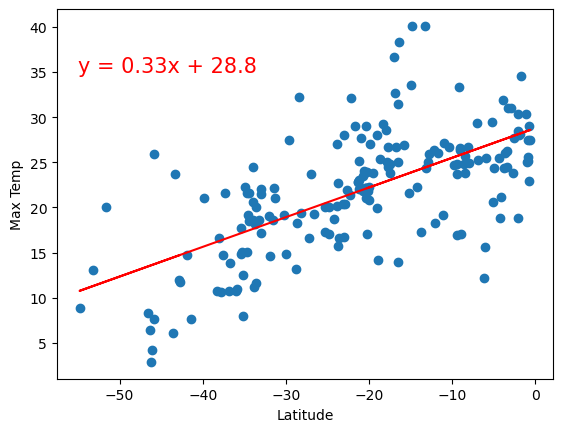

In [78]:
# Linear regression on Southern Hemishpere

In [8]:
# Create Northern and Southern Hemisphere DataFrames
import 'city_data_df' as dataFrame
northern_hemi_weather_df = city_data.loc[city_data["Lat"] >= 0]
southern_hemi_weather_df = city_data.loc[city_data["Lat"] < 0]

ModuleNotFoundError: No module named 'city_data'

In [55]:

def new_func():# Create a scatter plot for latitude vs max temp (northern hemisphere)
    x_values = ["Lat"]
    y_values = ["Max Temp"]
    plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

# Save the figure
plt.savefig("./output_data/northern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()
southern_hemisphere_data = city_data.loc[city_data["Lat"] < 0]

new_func()

<Figure size 640x480 with 0 Axes>

AttributeError: 'list' object has no attribute 'loc'

In [54]:


# Linear regression on Southern Hemisphere
 #Create a function to create Linear Regression plots for remaining activities
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    date_now = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {date_now}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    
    

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

# Northern Hemisphere


The r-value is: 0.0002808747046324607


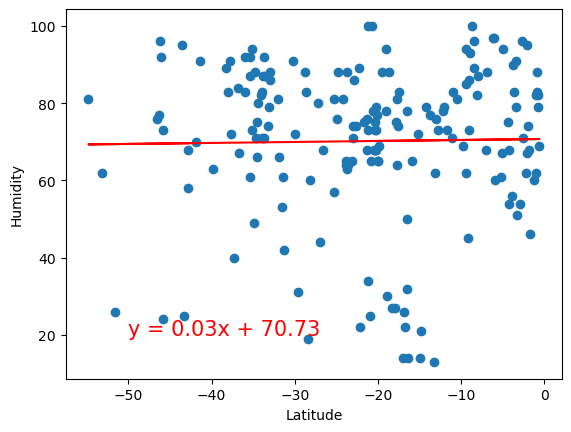

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


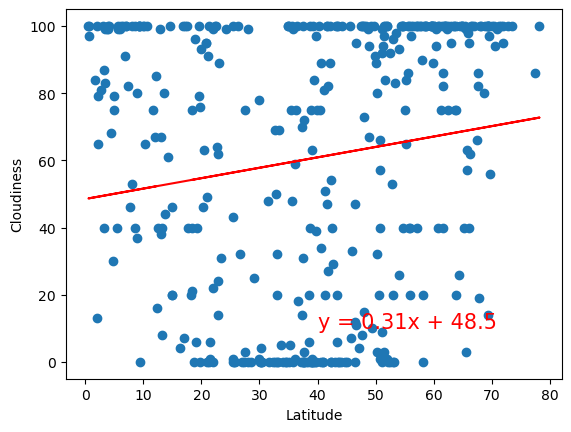

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


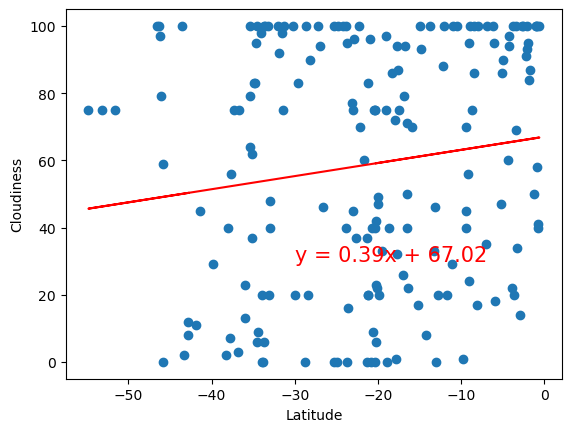

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


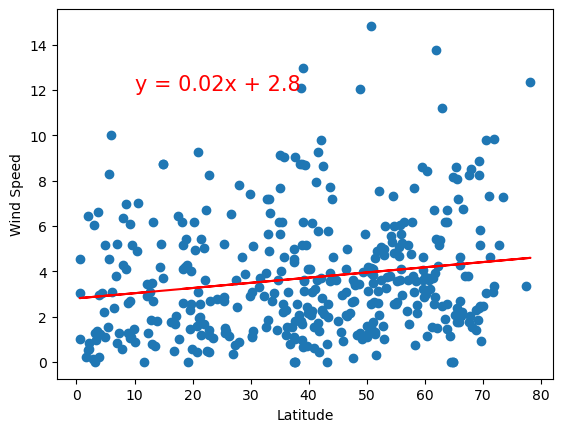

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


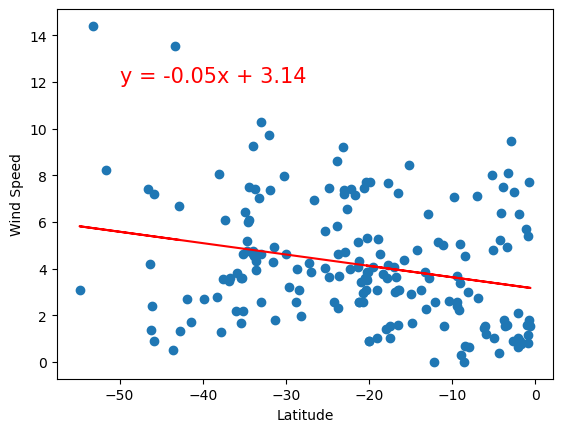

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE